In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd

In [6]:
import pandas as pd

dataset = pd.read_csv("C:\\Users\\santhiya99gmail.com\\Downloads\\archive\\housing.csv")

data = dataset.iloc[:, :-1].values  # Feature values
labels = dataset.iloc[:, -1].values  # Target values

In [9]:
data = data / np.max(data, axis=0)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(1, activation='linear')
])




Training with batch size 16
Epoch 1/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0303 - mae: 1.1388 - val_loss: 2.0695 - val_mae: 1.1381
Epoch 2/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0231 - mae: 1.1326 - val_loss: 2.0697 - val_mae: 1.1374
Epoch 3/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0001 - mae: 1.1271 - val_loss: 2.0686 - val_mae: 1.1449
Epoch 4/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0014 - mae: 1.1314 - val_loss: 2.0695 - val_mae: 1.1384
Epoch 5/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0151 - mae: 1.1323 - val_loss: 2.0696 - val_mae: 1.1376
Epoch 6/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0355 - mae: 1.1384 - val_loss: 2.0696 - val_mae: 1.1376
Epoch 7/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9982 - mae: 1.1235 - val_loss: 2.0686 - val_mae: 1.1444
Epoch 8/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9907 - mae: 1.1259 - val_loss: 2.0688 - val_mae: 1.1432
Epoch 9/20
1

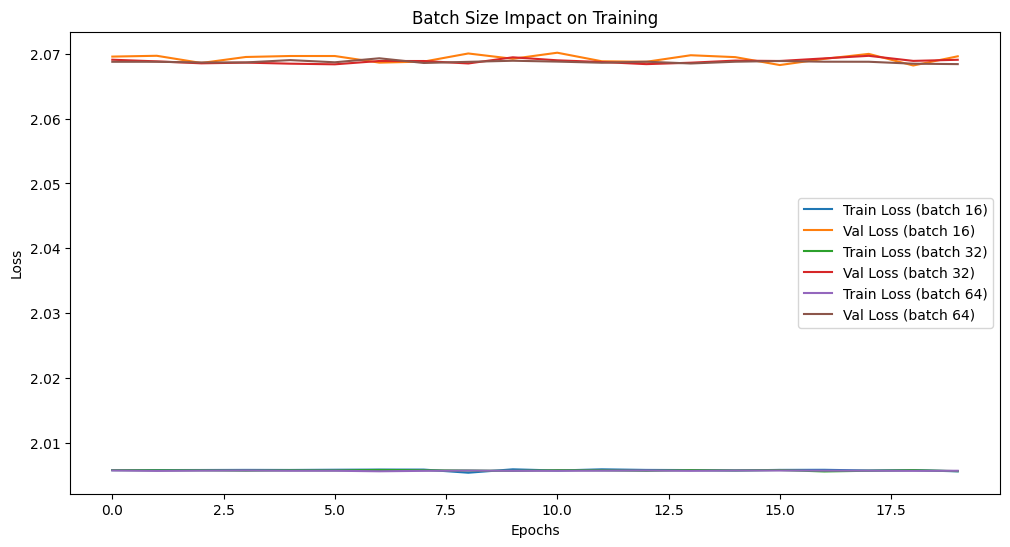

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model.compile(optimizer=RMSprop(), loss='mse', metrics=['mae'])

batch_sizes = [16, 32, 64]
histories = {}

for batch_size in batch_sizes:
    print(f"Training with batch size {batch_size}")
    history = model.fit(x_train, y_train_encoded, epochs=20, batch_size=batch_size, validation_data=(x_test, y_test_encoded))
    histories[batch_size] = history.history

plt.figure(figsize=(12, 6))
for batch_size, history in histories.items():
    plt.plot(history['loss'], label=f'Train Loss (batch {batch_size})')
    plt.plot(history['val_loss'], label=f'Val Loss (batch {batch_size})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Batch Size Impact on Training')
plt.show()

In [7]:

num_samples = len(x_train)
for batch_size in batch_sizes:
    num_batches = np.ceil(num_samples / batch_size)
    print(f"Batch size {batch_size}: {int(num_batches)} mini-batches per epoch")

Batch size 16: 1032 mini-batches per epoch
Batch size 32: 516 mini-batches per epoch
Batch size 64: 258 mini-batches per epoch
